# Regresión lineal: Costo de un incidente de Seguridad.
En este ejemplo se explicarán y aplicarán los fundamentos básicos de la regresión lineal, aplicada a un caso de uso sencillo relacionado cono la Ciberseguridad.

# Enunciado del ejercicio.
EL ejercicio consite en predecir  el costo de un incidente de seguridad en base al número de equipos que se han visto afectados por la inundacioon de Tula. El conjunto de datos es generado de manera aleatoria.

In [2]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
print("La longitud del conjunto de datos es: ", len(X))

La longitud del conjunto de datos es:  100


## 2.- Vizualización del DataSet.

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

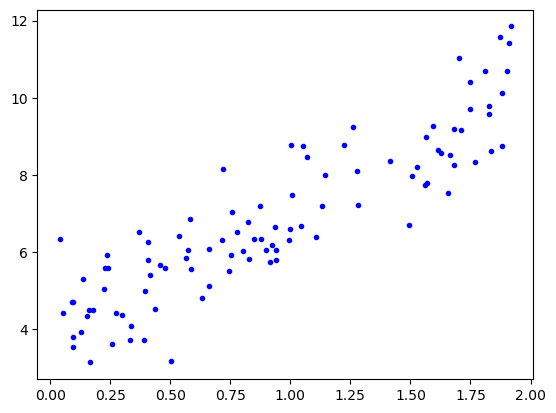

In [5]:
plt.plot(X, y, 'b.')
plt.show()

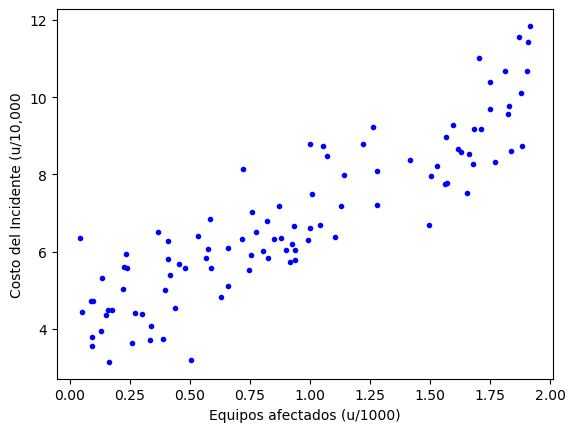

In [6]:
plt.plot(X, y, 'b.')
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Costo del Incidente (u/10,000")
plt.show()

### 3.- Modificación del DataSet.

In [7]:
import pandas as pd

In [14]:
data = {'No._Equipos_Afectados':X.flatten(), 'Costo': y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,No._Equipos_Afectados,Costo
0,0.300357,4.374312
1,0.758274,7.031501
2,0.456524,5.667487
3,1.880139,10.115802
4,0.226405,5.589394
5,0.409366,6.273826
6,0.719888,8.146287
7,0.535921,6.413544
8,0.872488,7.185745
9,1.415361,8.371898


In [15]:
# Escalado del numero de queipos afectados
df['No._Equipos_Afectados'] = df['No._Equipos_Afectados'] * 1000
df['No._Equipos_Afectados'] = df['No._Equipos_Afectados'].astype('int')
# Escalar el costo
df['Costo'] = df['Costo'] *1000
df['Costo'] = df['Costo'].astype('int')
df.head(10)

,No._Equipos_Afectados,Costo
0,300,4374
1,758,7031
2,456,5667
3,1880,10115
4,226,5589
5,409,6273
6,719,8146
7,535,6413
8,872,7185
9,1415,8371


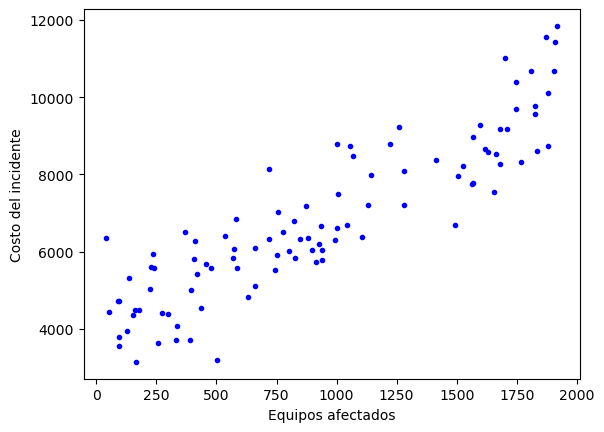

In [17]:
# Representación del conjunto de datos
plt.plot(df['No._Equipos_Afectados'],df['Costo'], 'b.')
plt.xlabel("Equipos afectados")
plt.ylabel("Costo del incidente")
plt.show()

## 4.- Construcción del modelo

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
# Construcción del modelo y ajuste de la función de hipótesis
lin_reg = LinearRegression()
lin_reg.fit(df['No._Equipos_Afectados'].values.reshape(-1,1), df['Costo'].values)

LinearRegression()

In [20]:
# Parametro Theta 0 
lin_reg.intercept_

3930.1903528780135

In [21]:
# Parametro Theta en 1
lin_reg.coef_

array([3.1264752])

In [23]:
# Predicción para el valor mínimo y máximo del conjunto de datos de entrenamiento
X_min_max = np.array([[df["No._Equipos_Afectados"].min()],[df["No._Equipos_Afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

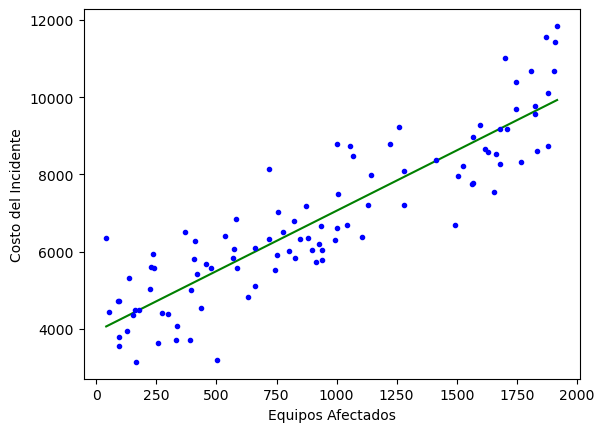

In [25]:
# Representación gráfica de la función hipótesis generada.
plt.plot(X_min_max, y_train_pred, 'g-')
plt.plot(df['No._Equipos_Afectados'],df['Costo'],'b.')
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente")
plt.show()

### Predicción de nuevos ejemplos.

In [34]:
x_new = np.array([[3000]]) # 1,300 equipos afectados
# Predicción del costo que tendría el incidente
Costo = lin_reg.predict(x_new)
print("EL costo del incidente sería: $", int(Costo[0]))

EL costo del incidente sería: $ 13309


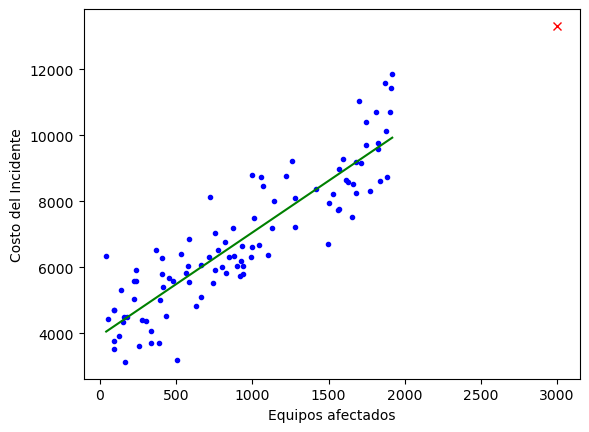

In [35]:
plt.plot(df['No._Equipos_Afectados'], df['Costo'], 'b.')
plt.plot(X_min_max, y_train_pred, 'g-')
plt.plot(x_new, Costo, 'rx')
plt.xlabel("Equipos afectados")
plt.ylabel("Costo del Incidente")
plt.show()